In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import tree, datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [8]:
n=11
clf = tree.DecisionTreeClassifier(max_depth=n)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

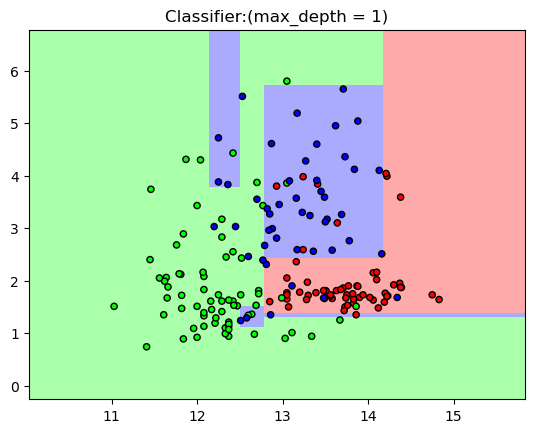

In [9]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 1)")

plt.show()
